# 1. Perkenalan

```
Nama        : Dini Anggriyani
Batch       : HCK-023
Objective   : 
Program ini dibuat untuk memprediksi kemampuan bernalar siswa dengan kaitannya dengan dukung lingkungan dan sumber daya yang dimiliki. Dataset yang akan digunakan kali ini terdiri dari 17 kolom dan 6000 baris 

## Problem Statement

[URL Dataset](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?select=StudentPerformanceFactors.csv)


Problem: Mengidentifikasi faktor-faktor yang memengaruhi performa belajar siswa di sekolah dan memberikan rekomendasi kepada orang tua untuk dapat mendukung perkembangan anak


Indonesia menduduki peringkat 68 dari 81 negara di dunia dalam kemampuan matematika yang erat hubungannya dengan kemampuan bernalar. Hal ini cukup mengkhawatirkan karena Indonesia sendiri digadang-gadang akan memiliki bonus demografi di tahun 2045 di mana jumlah penduduk yang berusia muda akan lebih banyak dari jumlah penduduk yang berusia senja. Generasi muda  akan mulai mengambil alih kendali atas negeri ini yang mana akan sangat berbahaya apabila generasi penerus tidak memiliki kemampuan bernalar yang mumpuni. Sebagai tambahan, tidak seimbangnya kemampuan bernalar dengan kebutuhan industri di masa depan akan menyebabkan lebih banyak pengangguran yang akan membebani ekonomi baik bagi negara maupun bagi individu itu sendiri. Program yang akan dibuat ini akan membantu untuk memprediksi performa matematika seorang pelajar yang dinyatakan dalam skor berdasarkan beberapa faktor diantaranya latar belakang keluarga, pengaruh teman sejawat, jarak antara rumah dan sekolah, serta fasilitas pendukung proses belajar anak seperti diadakannya kegiatan ektrakurikuler. 
- Bagi orang tua, program ini bisa dijadikan acuan untuk pertimbangan memilih sekolah dan acuan untuk lebih memperhatikan fasilitas dan dukungan mental yang dapat meningkatkan performa anak-anaknya. 
- Bagi pelajar, program ini bisa dijadikan acuan untuk menjaga diri dari hal-hal yang mungkin dapat berpengaruh terhadap performanya di sekolah, khususnya di bidang matematika. 
- Acuan problematika di atas diambil dari sumber di internet dan penelitian sebelumnya yang ada pada link di bawah ini:

Justifikasi:
* [Kemampuan Sains dan Matematika Siswa Indonesia](https://mediaindonesia.com/opini/638003/hasil-pisa-2022-refleksi-mutu-pendidikan-nasional-2023#:~:text=HASIL%20penelitian%20Program%20for%20International%20Student%20Assessment%20%28PISA%29,skor%3B%20matematika%20%28379%29%2C%20sains%20%28398%29%2C%20dan%20membaca%20%28371%29.)
* [Potensi Bonus Demografi](https://setkab.go.id/en/president-jokowi-highlights-indonesias-demographic-potentials-challenges/)
* [Score Test Effects on Economy](https://www.edweek.org/teaching-learning/opinion-what-do-test-scores-really-mean-for-the-economy/2018/06)

User/pengguna: Orang tua yang memiliki anak usia sekolah, masyarakat yang berencana memiliki anak, dan siswa yang berupaya untuk meningkatkan performa belajar


# 2. Import Libraries

In [119]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kendalltau, spearmanr, chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xg
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle

# 3. Data Loading

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Kolom Internet_Access akan dianggap sudah diwakili oleh kolom Resources karena bagaimana pun juga internet termasuk ke dalam sumber pembelajaran. Oleh karena itu kolom Internet_Access akan didrop. Karena tujuan dari pemodelan ini adalah untuk memberikan rekomendasi kepada pelajar maupun kepada orang tua, maka kolom gender akan didrop agar masukan yang diberikan lebih general sehingga bisa untuk semua gender. Drop kolom akan dilakukan pada salinan agar tidak mengganggu dataset asli

In [3]:
teams = df.copy()
teams

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [171]:
for cols in teams.columns.to_list():
    print(cols)

Hours_Studied
Attendance
Parental_Involvement
Access_to_Resources
Extracurricular_Activities
Sleep_Hours
Previous_Scores
Motivation_Level
Tutoring_Sessions
Family_Income
Teacher_Quality
School_Type
Peer_Influence
Physical_Activity
Learning_Disabilities
Parental_Education_Level
Distance_from_Home
Exam_Score


In [4]:
teams = teams.drop(columns=['Internet_Access', 'Gender'])
teams

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,No,High School,Near,67
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,No,College,Near,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,1,High,Medium,Public,Positive,2,No,High School,Near,68
6603,23,76,High,Medium,No,8,81,Medium,3,Low,High,Public,Positive,2,No,High School,Near,69
6604,20,90,Medium,Low,Yes,6,65,Low,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,68
6605,10,86,High,High,Yes,6,91,High,2,Low,Medium,Private,Positive,3,No,High School,Far,68


In [157]:
teams.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [169]:
teams['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

Selanjutnya, akan dilakukan cek tipe data

In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Tutoring_Sessions           6607 non-null   int64 
 9   Family_Income               6607 non-null   object
 10  Teacher_Quality             6529 non-null   object
 11  School_Type                 6607 non-null   object
 12  Peer_Influence              6607 non-null   object
 13  Physical_Activity           6607 non-null   int6

# 4. Exploratory Data Analysis (EDA)

## Persebaran Data

In [153]:
num_cols = teams.select_dtypes(include=(np.number)).columns.tolist()
cat_cols = teams.select_dtypes(include=['object']).columns.tolist()

print('Cateorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Cateorical Columns:  ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']
Numerical Columns:  ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [151]:
#cek distribusi skewness
listItem = []
#menghitung nilai skewness ke dalam loop agar tidak perlu menghitung nilai skewness satu per satu tiap kolom
for col in num_cols:
    listItem.append([col, round(teams[col].skew(),1), np.where(
        (round(teams[col].skew(),1) <= 0.5) & (round(teams[col].skew(), 1) >= -0.5),
        'normal', 'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'jenis distribusi'], data= listItem)
skewness

,nama kolom,nilai skewness,jenis distribusi
0,Hours_Studied,0.0,normal
1,Attendance,0.0,normal
2,Sleep_Hours,-0.0,normal
3,Previous_Scores,-0.0,normal
4,Tutoring_Sessions,0.8,skewed
5,Physical_Activity,-0.0,normal
6,Exam_Score,1.6,skewed


Dapat dilihat bahwa yang dimiliki cenderung normal kecuali kolom Tutoring_Sessions dan Exam_Score. Visualisasi persebaran data digambarkan dengan grafik berikut

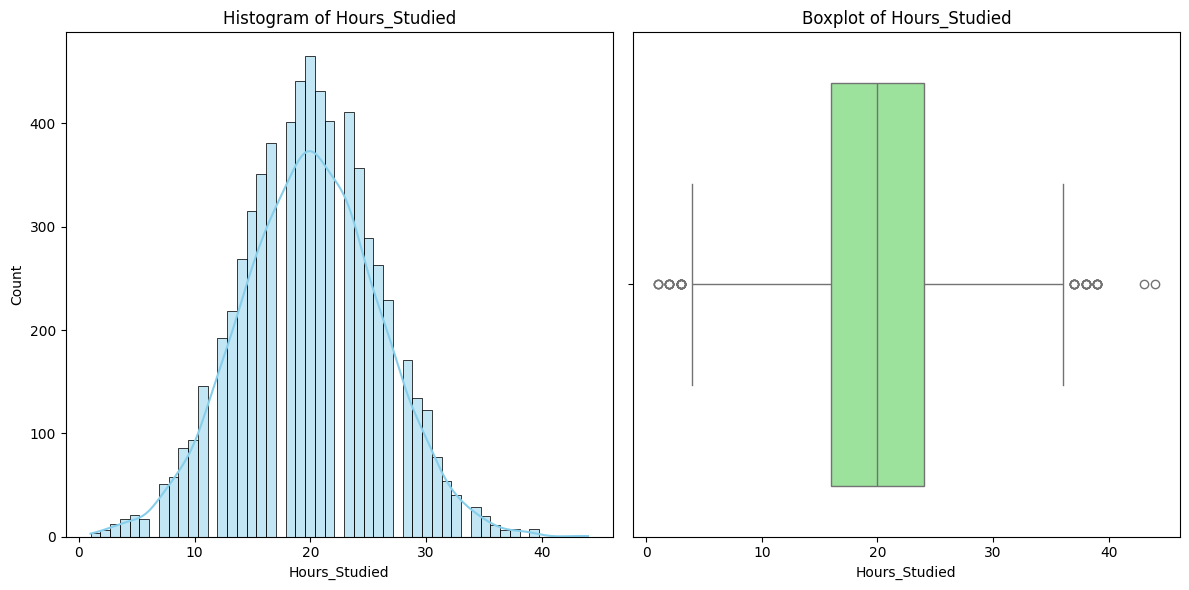

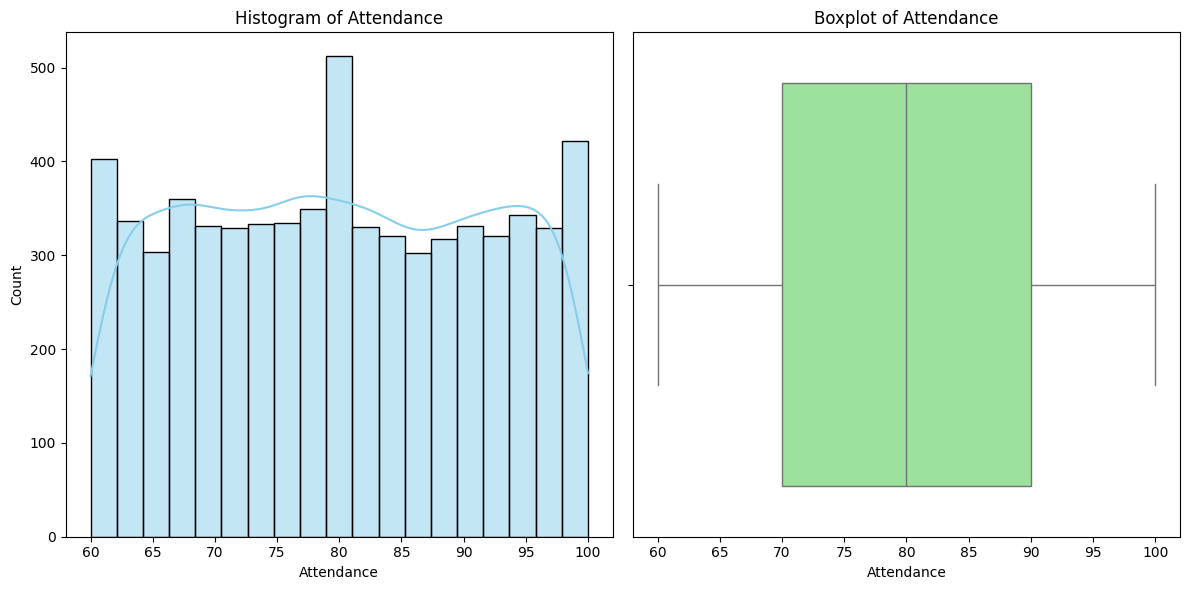

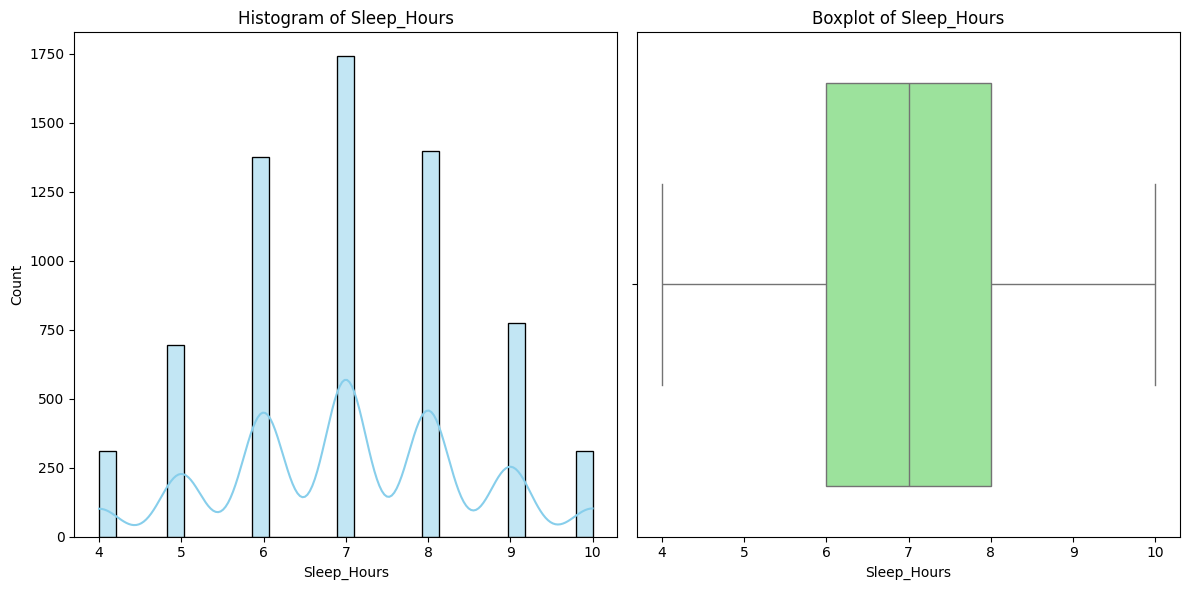

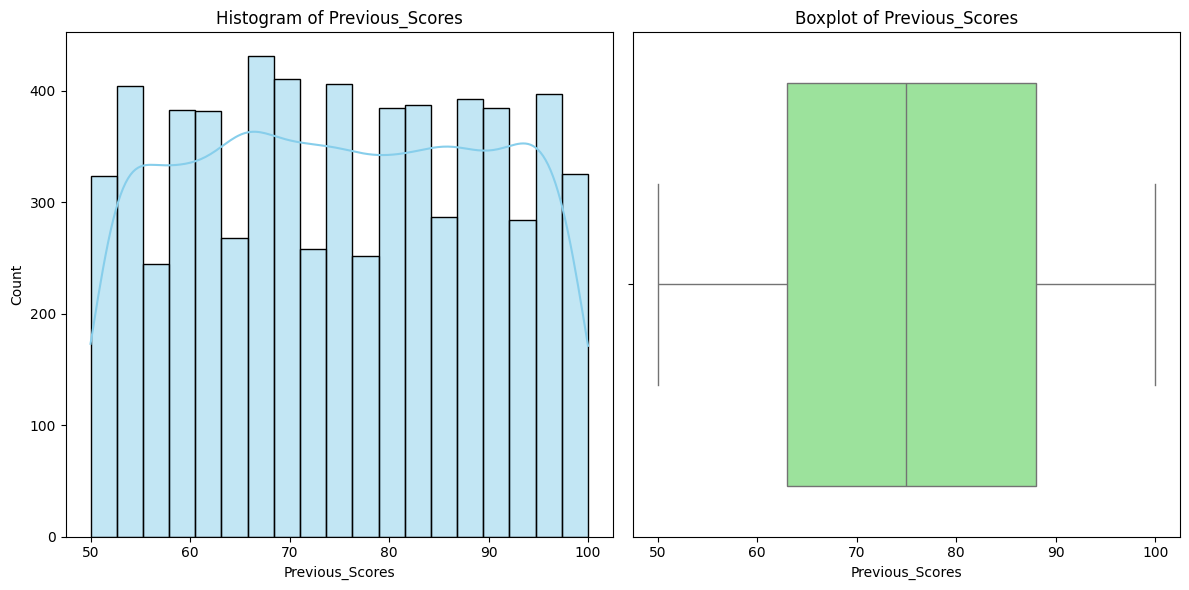

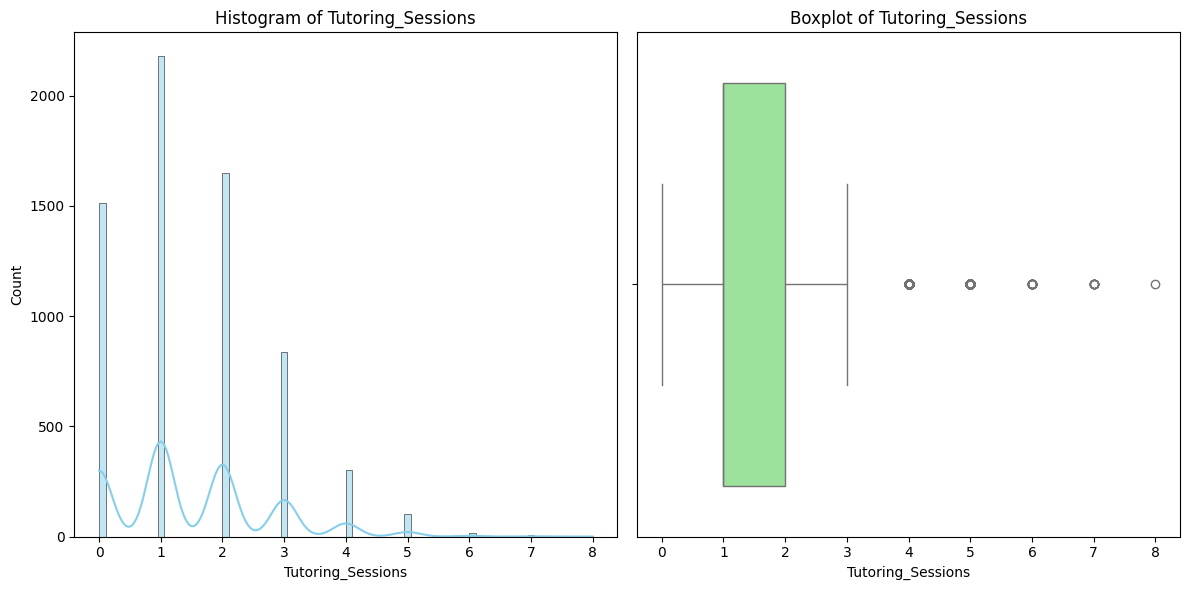

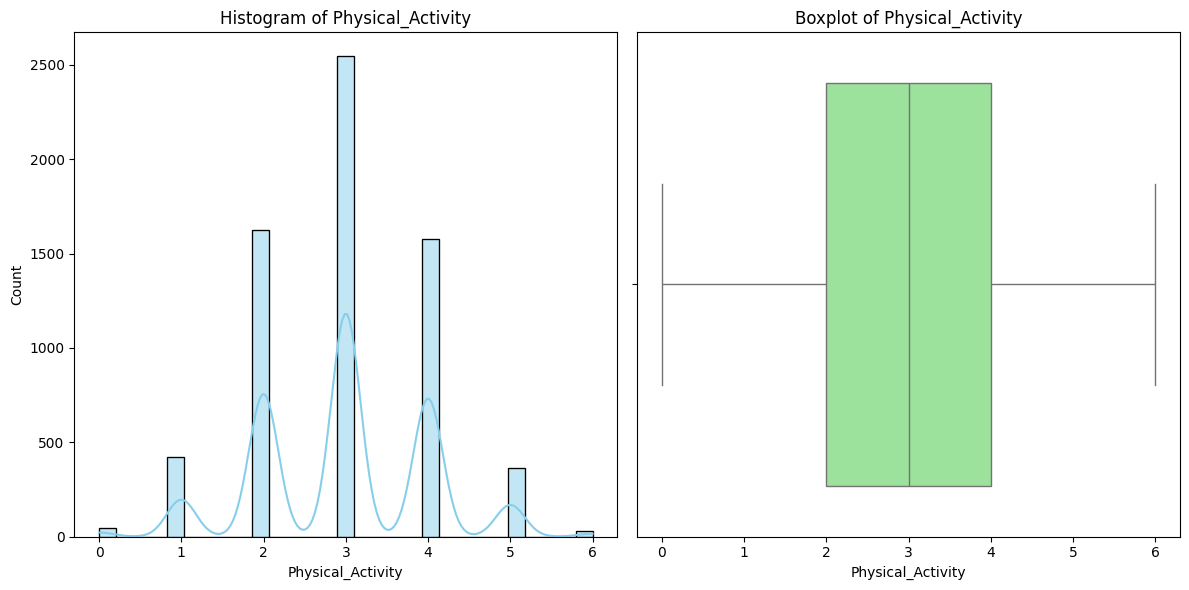

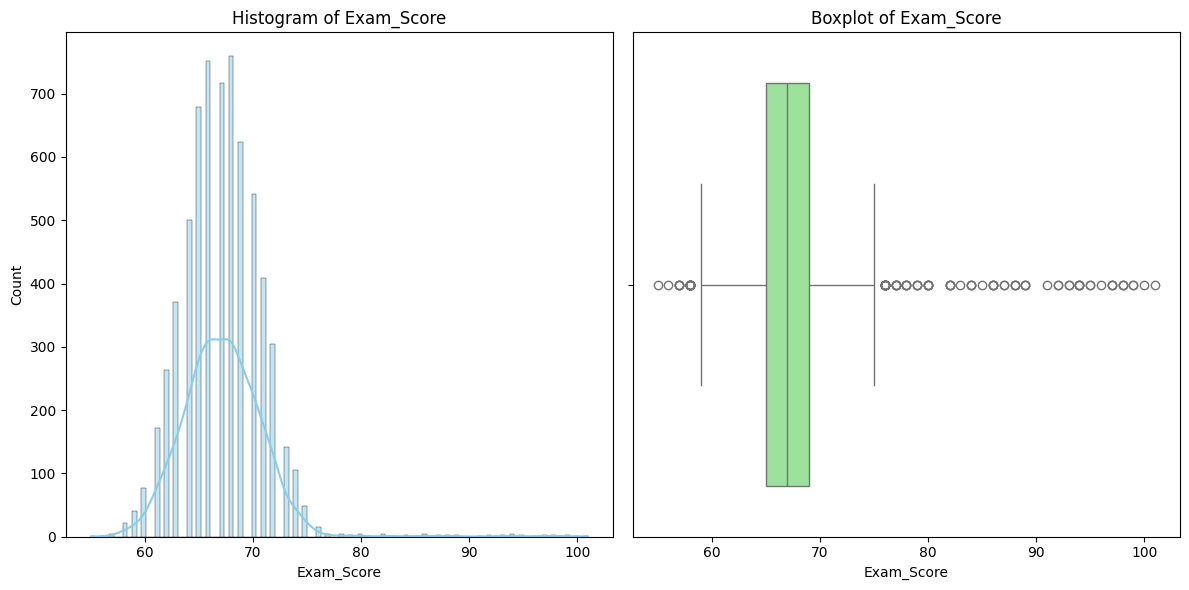

In [156]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(teams[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=teams[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [144]:
teams.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score'],
      dtype='object')

## Presentase Jarak Antara Sekolah dan Rumah

In [8]:
# Hitung persentase
percentage = teams['Distance_from_Home'].value_counts(normalize=True) * 100
print("Persentase jarak rumah ke sekolah:", percentage)


Persentase jarak rumah ke sekolah: Distance_from_Home
Near        59.388379
Moderate    30.550459
Far         10.061162
Name: proportion, dtype: float64


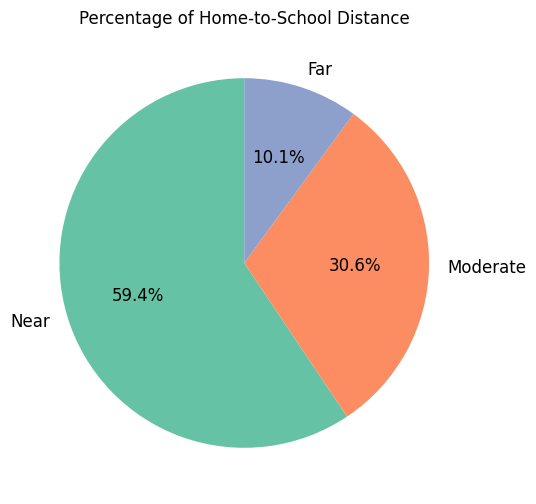

In [9]:
# Plot pie chart
plt.figure(figsize=(6, 6))
percentage.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'], fontsize=12)
plt.title('Percentage of Home-to-School Distance')
plt.ylabel('')  # Hilangkan label y
plt.show()


Insight

Sebanyak 10.1% orang tua memilih menyekolahkan anaknya di sekolah yang jauh dan sebanyak 30.6% memilih sekolah yang tidak terlalu jauh maupun tidak terlalu dekat dengan rumah. Hal ini bisa jadi karena faktor kualitas sekolah menjadi hal utama dalam pengambilan keputusan

## Apakah Anak yang memiliki performa yang baik di sekolah memiliki keterlibatan orang tua yang aktif?

Untuk mengetahui ini, terlebih dahulu harus menguji korelasi antara keterlibatan orang tua dengan performa anak di sekolah

In [10]:
corr_pho, pval_k = stats.kendalltau(teams['Parental_Involvement'], teams['Exam_Score'])
print(f"tau-correlation: {corr_pho:.2f}, p-value: {pval_k}")

tau-correlation: -0.07, p-value: 1.1376969592362287e-11


Dari hasil uji korelasi di atas, dapat disimpulkan bahwa keterlibatan orang tua memiliki pengaruh terhadap performa anak di sekolah

In [137]:
grouped = teams.groupby('Parental_Involvement')['Exam_Score']
median = grouped.median()

print('Skor rata-rata siswa berdasarkan keterlbibatan orang tua: ', median) 

Skor rata-rata siswa berdasarkan keterlbibatan orang tua:  Parental_Involvement
High      68.0
Low       66.0
Medium    67.0
Name: Exam_Score, dtype: float64


C:\Users\asusn\AppData\Local\Temp\ipykernel_17220\3032651917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=teams, palette='Set2')


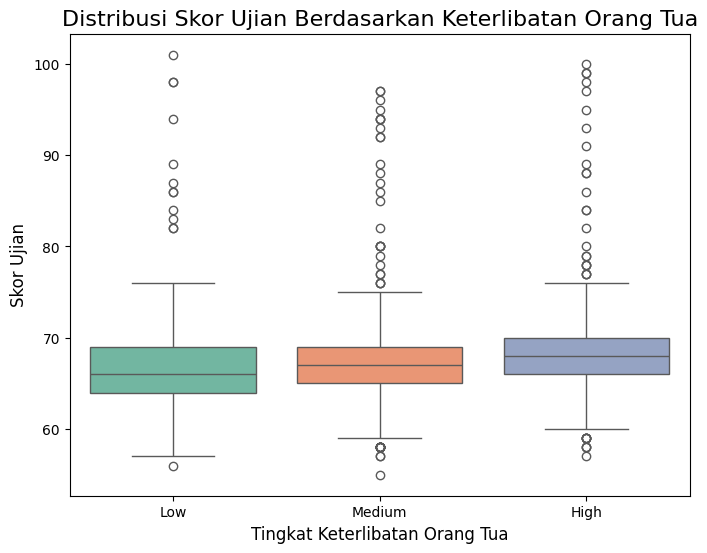

In [146]:
# Visualisasi menggunakan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=teams, palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Skor Ujian Berdasarkan Keterlibatan Orang Tua', fontsize=16)
plt.xlabel('Tingkat Keterlibatan Orang Tua', fontsize=12)
plt.ylabel('Skor Ujian', fontsize=12)

# Menampilkan plot
plt.show()


Dari analisa di atas, dapat disimpulkan bahwa semakin tinggi keterlibatan orang tua, semakin tinggi performa anak di sekolah. Artinya antara keterlibatan orang tua dengan performa anak memiliki korelasi yang positif. Keterlibatan yang dimaksud adalah berupa pemberian dukungan mental dan fasilitas yang menunjang performa anak

## Apakah latar belakang ekonomi keluarga memengaruhi motivasi pada anak?

In [185]:
corr_pho, pval_k = stats.kendalltau(teams['Family_Income'], teams['Motivation_Level'])
print(f"tau-correlation: {corr_pho:.2f}, p-value: {pval_k}")

tau-correlation: -0.01, p-value: 0.4963885196182516


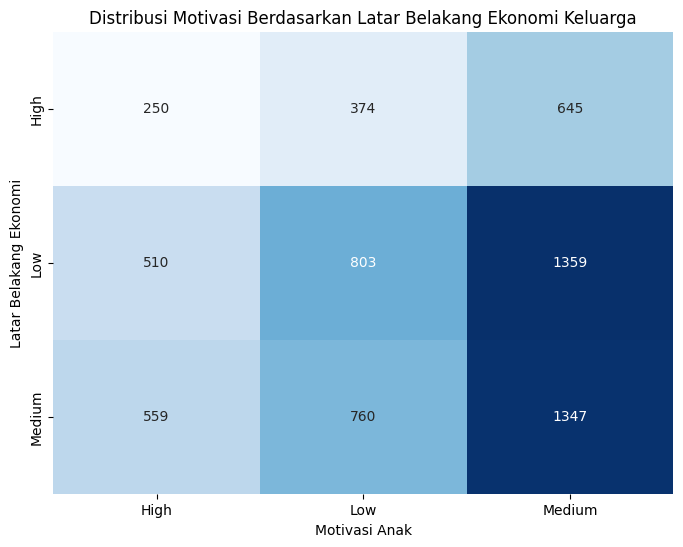

In [186]:
# Membuat Tabel Kontingensi
contingency_table = pd.crosstab(teams['Family_Income'], teams['Motivation_Level'])

# Membuat Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Distribusi Motivasi Berdasarkan Latar Belakang Ekonomi Keluarga")
plt.ylabel("Latar Belakang Ekonomi")
plt.xlabel("Motivasi Anak")
plt.show()


Dari hasil di atas dapat motivasi belajar yang tinggi cenderung didorong dari latar belakang ekonomi yang medium. Sedangkan motivasi belajar yang rendah cenderung didapati dari anak-anak yang memiliki latar belakang ekonomi yang rendah

## Bagaimana kualitas pengajar berdasarkan tipe sekolah?

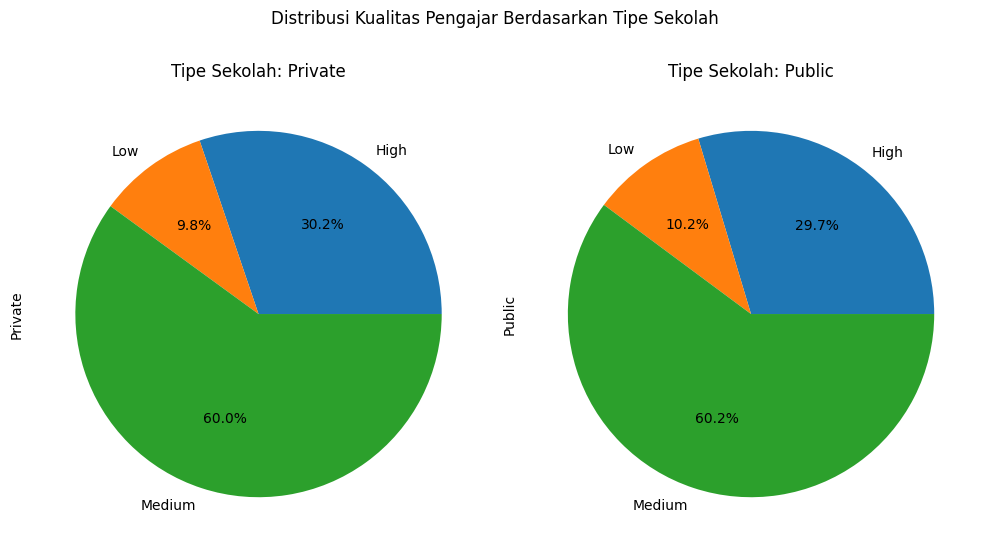

In [ ]:
# Membuat figure untuk visualisasi
plt.figure(figsize=(10, 6))

# Grouping data berdasarkan Tipe Sekolah dan Kualitas Pengajar
grouped = teams.groupby(['School_Type', 'Teacher_Quality']).size().unstack()

# Menampilkan pie chart untuk setiap Tipe Sekolah
for i, school_type in enumerate(grouped.index):
    plt.subplot(1, len(grouped.index), i+1)  # Menentukan jumlah subplots berdasarkan jumlah Tipe Sekolah
    data = grouped.loc[school_type]  # Data untuk tipe sekolah tertentu
    data.plot(kind='pie', autopct='%1.1f%%', legend=False)
    plt.title(f'Tipe Sekolah: {school_type}')

# Menambahkan judul umum
plt.suptitle('Distribusi Kualitas Pengajar Berdasarkan Tipe Sekolah')

# Menampilkan plot
plt.tight_layout()
plt.show()


Dari hasil uji di atas dapat dilihat bahwa sekolah swasta lebih banyak memiliki kualitas pengajar yang tinggi dibandingkan sekolah negeri. Hal ini bisa menjadi acuan bagi para orang tua terutama untuk pendidikan dasar

## Conceptual Problems:
1. Latar belakang adanya bagging adalah untuk meningkatkan performa model supaya akurasi dan stabilitas machine learning meningkat terutama pada aalgoritma yang  varians nya tinggi. Cara kerja bagging adalah dengan membuat model prediktif pada subset data yang berbeda kemudian menggabungkan hasil prediksinya
2. Perbedaan algoritam random forest dengan algoritma yang saya pilih (SVR) adalah algoritma random forest bekerja dengan cara membagi dataset menjadi beberapa decision tree untuk selanjutnya dibagi lagi sampai terbentuk leaf node. Sedangkan algoritma SVR bekerja dengan cara sampling menggunakan kernel untuk mencari hyperplane terbaik untuk meminimalkan error
3. Cross Validation adalah metode evaluasi machine learning yang bekerja dengan cara membagi dataset menjadi beberapa fold untuk melatih dan menguji model secara berulang. Tujuannya adalah untuk memastikan bahwa model dapat mengeneralisasikan pada data baru dan tidak overfit pada data training

# 5. Feature Engineering

## Check Cardinality

In [12]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(teams.select_dtypes(include=['object']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, teams[col].nunique(), teams[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Parental_Involvement,3,"[Low, Medium, High]"
1,Access_to_Resources,3,"[High, Medium, Low]"
2,Extracurricular_Activities,2,"[No, Yes]"
3,Motivation_Level,3,"[Low, Medium, High]"
4,Family_Income,3,"[Low, Medium, High]"
5,Teacher_Quality,3,"[Medium, High, Low, nan]"
6,School_Type,2,"[Public, Private]"
7,Peer_Influence,3,"[Positive, Negative, Neutral]"
8,Learning_Disabilities,2,"[No, Yes]"
9,Parental_Education_Level,3,"[High School, College, Postgraduate, nan]"


## Split X (Features) dan Y (Target)

In [13]:
x = teams.drop(['Exam_Score'], axis=1) #parameter axis=1 menunjukan bahwa penghapusan terjadi pada kolom, bukan baris
y = teams['Exam_Score']
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,No,High School,Near
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,No,College,Moderate
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,No,High School,Moderate
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,No,College,Near
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,1,High,Medium,Public,Positive,2,No,High School,Near
6603,23,76,High,Medium,No,8,81,Medium,3,Low,High,Public,Positive,2,No,High School,Near
6604,20,90,Medium,Low,Yes,6,65,Low,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near
6605,10,86,High,High,Yes,6,91,High,2,Low,Medium,Private,Positive,3,No,High School,Far


In [14]:
y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

## Split Train Set & Test Set

Test set akan disetting di angka 15%

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

print('Train Size: ', y_train.shape)
print('Test Size: ', y_test.shape)

Train Size:  (5615,)
Test Size:  (992,)


Cek class distribution

In [16]:
#distribusi test set
np.array(np.unique(y_test, return_counts=True)).T

array([[ 58,   2],
       [ 59,   8],
       [ 60,  13],
       [ 61,  22],
       [ 62,  36],
       [ 63,  50],
       [ 64,  63],
       [ 65, 111],
       [ 66, 113],
       [ 67,  96],
       [ 68, 135],
       [ 69,  99],
       [ 70,  75],
       [ 71,  61],
       [ 72,  45],
       [ 73,  21],
       [ 74,  17],
       [ 75,  10],
       [ 76,   3],
       [ 77,   1],
       [ 79,   2],
       [ 80,   1],
       [ 82,   1],
       [ 83,   1],
       [ 86,   1],
       [ 89,   1],
       [ 92,   1],
       [ 93,   1],
       [ 98,   1],
       [ 99,   1]])

In [17]:
#distribusi train set
np.array(np.unique(y_train, return_counts=True)).T

array([[ 55,   1],
       [ 56,   1],
       [ 57,   4],
       [ 58,  20],
       [ 59,  32],
       [ 60,  64],
       [ 61, 149],
       [ 62, 228],
       [ 63, 321],
       [ 64, 438],
       [ 65, 568],
       [ 66, 638],
       [ 67, 621],
       [ 68, 624],
       [ 69, 525],
       [ 70, 467],
       [ 71, 347],
       [ 72, 259],
       [ 73, 120],
       [ 74,  89],
       [ 75,  38],
       [ 76,  13],
       [ 77,   4],
       [ 78,   4],
       [ 79,   1],
       [ 80,   4],
       [ 82,   3],
       [ 84,   3],
       [ 85,   1],
       [ 86,   3],
       [ 87,   2],
       [ 88,   3],
       [ 89,   2],
       [ 91,   1],
       [ 92,   1],
       [ 93,   1],
       [ 94,   4],
       [ 95,   2],
       [ 96,   1],
       [ 97,   3],
       [ 98,   2],
       [ 99,   1],
       [100,   1],
       [101,   1]])

## Handling Outliers

Cek distribusi skewness

In [18]:
#cek distribusi skewness
colom_number=list(x_train.select_dtypes(exclude='object').columns)

listItem = []
#menghitung nilai skewness ke dalam loop agar tidak perlu menghitung nilai skewness satu per satu tiap kolom
for col in colom_number:
    listItem.append([col, round(x_train[col].skew(),1), np.where(
        (round(x_train[col].skew(),1) <= 0.5) & (round(x_train[col].skew(), 1) >= -0.5),
        'normal', 'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'jenis distribusi'], data= listItem)
skewness

,nama kolom,nilai skewness,jenis distribusi
0,Hours_Studied,0.0,normal
1,Attendance,0.0,normal
2,Sleep_Hours,-0.0,normal
3,Previous_Scores,0.0,normal
4,Tutoring_Sessions,0.8,skewed
5,Physical_Activity,-0.0,normal


Distribusi dataset kebanyakan bersifat normal dan hanya ada 1 kolom yang bersifat skewed. Selanjutnya, kita akan cek banyaknya outliers dari masing-masing kolom

In [19]:
def detect_outliers(dataframe, columns):
    outliers_summary={
        'column': [],
        'lower_bound': [],
        'upper_bound': [],
        'outliers_count': [],
        'outliers_percentage': []
    }

    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col]>upper_bound)]
        outliers_count = outliers.shape[0]
        outliers_percentage = (outliers_count/dataframe.shape[0])*100

        outliers_summary['column'].append(col)
        outliers_summary['lower_bound'].append(lower_bound)
        outliers_summary['upper_bound'].append(upper_bound)
        outliers_summary['outliers_count'].append(outliers_count)
        outliers_summary['outliers_percentage'].append(outliers_percentage)

    return pd.DataFrame(outliers_summary)

numeric_col =['Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
outliers_report = detect_outliers(teams, numeric_col)

outliers_report

,column,lower_bound,upper_bound,outliers_count,outliers_percentage
0,Hours_Studied,4.0,36.0,43,0.650825
1,Attendance,40.0,120.0,0,0.000000
2,Sleep_Hours,3.0,11.0,0,0.000000
3,Previous_Scores,25.5,125.5,0,0.000000
4,Tutoring_Sessions,-0.5,3.5,430,6.508249
5,Physical_Activity,-1.0,7.0,0,0.000000


Terdapat satu kolom yang memiliki outlier > 5%, maka kolom tersebut akan dilakukan handling. Pada kasus ini, handling akan dilakukan dengan cara capping. Karena kolom Tutoring_Session bertipe skewed, maka capping akan dilakukan dengan metode IQR

In [20]:
winsorizer_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['Tutoring_Sessions'])
x_train_capped = winsorizer_fare.fit_transform(x_train)
x_test_capped = winsorizer_fare.fit_transform(x_test)

x_train_capped

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
3954,17,79,Medium,High,Yes,8,84,Medium,0,Medium,Medium,Public,Neutral,2,No,High School,Moderate
5204,34,78,Medium,High,Yes,8,68,Medium,1,Medium,Medium,Public,Negative,2,No,College,Near
2030,25,67,Medium,High,No,9,82,Medium,1,Medium,Medium,Public,Positive,3,No,Postgraduate,Far
4617,3,99,Medium,Low,Yes,7,68,Medium,2,High,Medium,Private,Neutral,3,No,High School,Near
6281,21,95,Low,Medium,No,7,78,High,2,Low,High,Public,Neutral,2,Yes,High School,Near
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7,74,Medium,Medium,Yes,6,66,Low,1,Low,High,Private,Positive,2,No,High School,Near
3264,24,96,Medium,High,Yes,5,69,Medium,1,Low,Medium,Public,Positive,4,No,High School,Near
1653,18,82,High,Medium,Yes,5,85,High,3,Medium,High,Private,Neutral,4,No,Postgraduate,Near
2607,7,88,Medium,High,Yes,7,64,Low,2,Medium,High,Public,Neutral,4,No,Postgraduate,Moderate


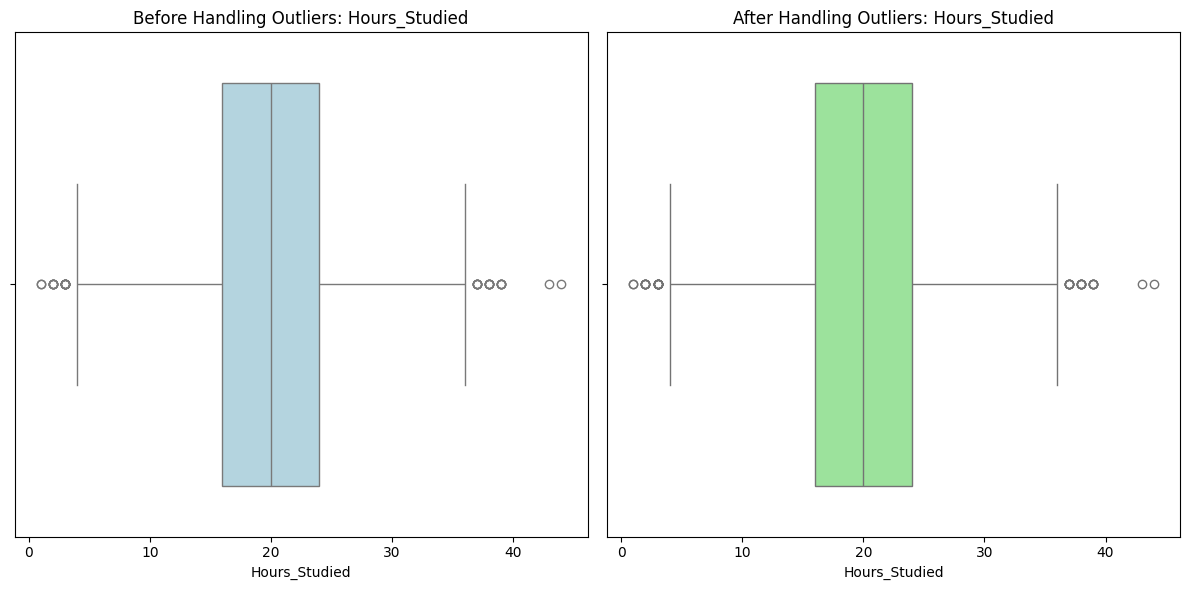

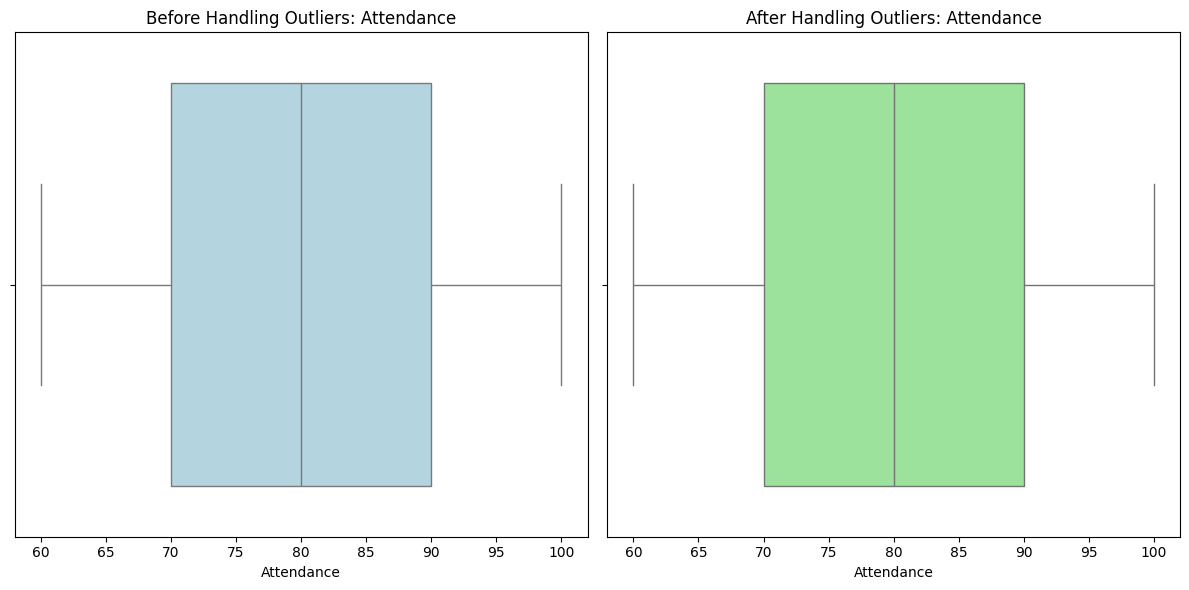

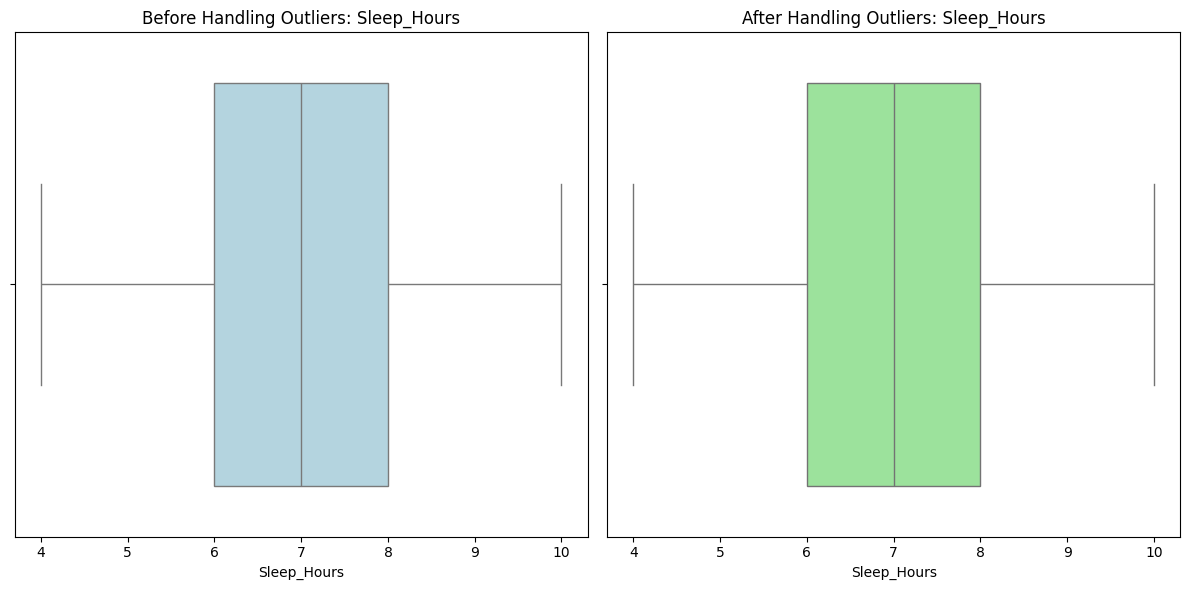

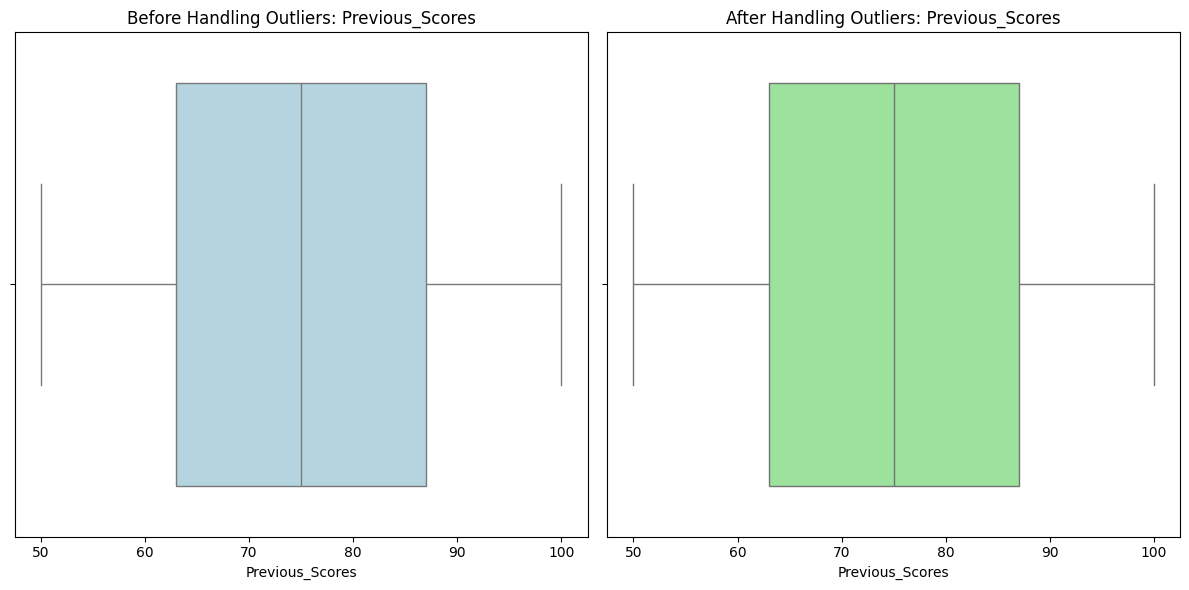

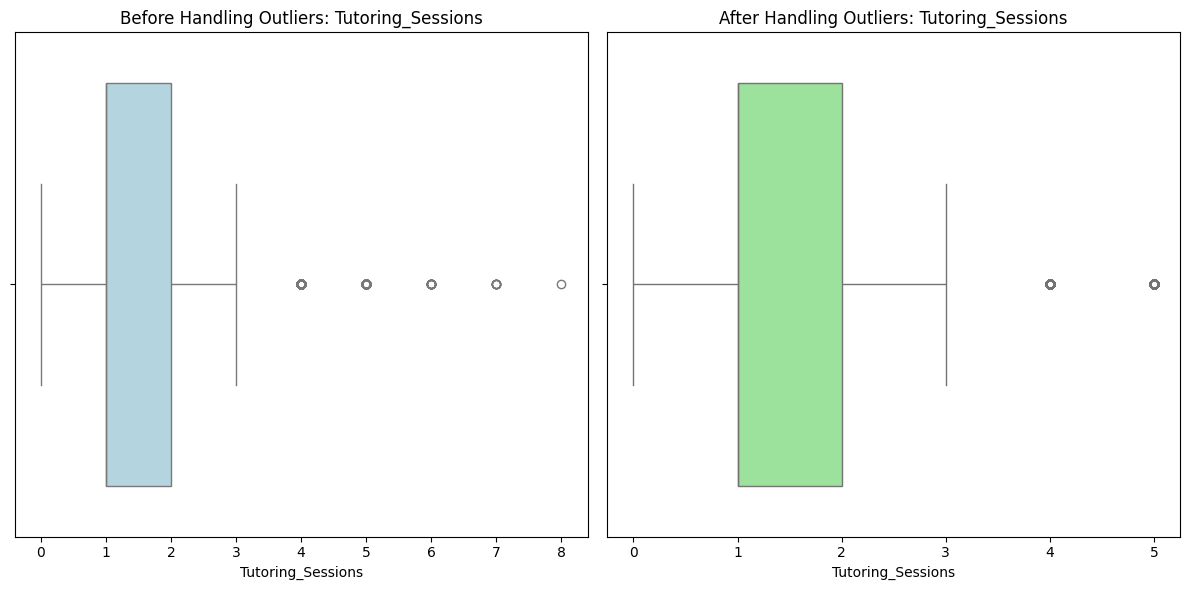

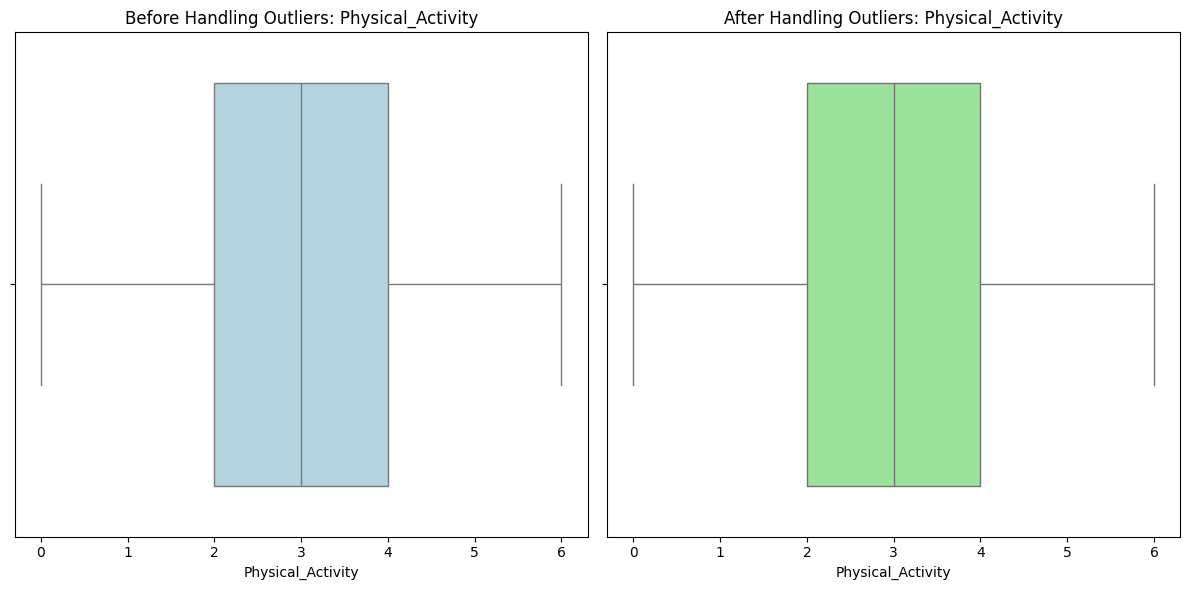

In [21]:
# Plot boxplot untuk setiap kolom numerik
for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    sns.boxplot(data=x_train, x=col, ax=axes[0], color='lightblue')
    sns.boxplot(data=x_train_capped, x=col, ax=axes[1], color='lightgreen')
    
    axes[0].set_title(f'Before Handling Outliers: {col}')
    axes[1].set_title(f'After Handling Outliers: {col}')
    plt.tight_layout()
    plt.show()


## Handling Missing Values

In [22]:
x_train_capped.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               62
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      73
Distance_from_Home            54
dtype: int64

In [23]:
x_test_capped.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               16
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      17
Distance_from_Home            13
dtype: int64

Missing value akan diisi dengan data terbanyak (modus)

In [24]:
modus_TQ = teams['Teacher_Quality'].mode()[0]
print('Modus Teachers Quality: ', modus_TQ )
modus_PE = teams['Parental_Education_Level'].mode()[0]
print('Modus Parental Education Level: ', modus_PE)
modus_DH = teams['Distance_from_Home'].mode()[0]
print('Modus Distance from Home: ', modus_DH)

Modus Teachers Quality:  Medium
Modus Parental Education Level:  High School
Modus Distance from Home:  Near


In [25]:
x_train_capped['Teacher_Quality'] = x_train_capped['Teacher_Quality'].fillna(modus_TQ)
x_test_capped['Teacher_Quality'] = x_test_capped['Teacher_Quality'].fillna(modus_TQ)
x_train_capped['Parental_Education_Level'] = x_train_capped['Parental_Education_Level'].fillna(modus_PE)
x_test_capped['Parental_Education_Level'] = x_test_capped['Parental_Education_Level'].fillna(modus_PE)
x_train_capped['Distance_from_Home'] = x_train_capped['Distance_from_Home'].fillna(modus_DH)
x_test_capped['Distance_from_Home'] = x_test_capped['Distance_from_Home'].fillna(modus_DH)

Selanjutnya, akan dilakukan pengecekan data yang sudah dihandle

In [26]:
x_train_capped.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
dtype: int64

In [27]:
x_test_capped.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
dtype: int64

## Split Numerical & Categorical

Karena kolom numerical dan categorical sudah di split sebelumnya, selenjutnya adalah menggabungkan kolom yang sudah fix.

In [28]:
num_cols = teams.select_dtypes(include=(np.number)).columns.tolist()
cat_cols = teams.select_dtypes(include=['object']).columns.tolist()

print('Cateorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Cateorical Columns:  ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']
Numerical Columns:  ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [29]:
#karena num_cols berbentuk list, maka kolom target akan dihapuskan terlebih dahulu
numeric_cols = [col for col in num_cols if col != 'Exam_Score']
numeric_cols


['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [30]:
x_train_capped_num = x_train_capped[numeric_cols]
x_train_capped_cat = x_train_capped[cat_cols]

x_test_capped_num = x_test_capped[numeric_cols]
x_test_capped_cat = x_test_capped[cat_cols]

x_test_capped_num

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
1830,24,87,6,78,0,2
994,14,81,5,58,3,4
6290,19,81,8,96,1,4
3848,19,73,9,86,0,3
3296,30,62,6,63,2,4
...,...,...,...,...,...,...
401,16,62,7,79,2,3
5421,13,60,7,70,1,3
3117,15,66,9,63,3,3
1718,24,73,7,70,0,3


## Feature Selection

Sebelum dilakukan feature selection, terlebih dahulu akan diuji jenis nilai korelasinya

In [31]:
correlations = {}

# Looping untuk setiap kolom
for _, row in skewness.iterrows():
    col = row['nama kolom']
    distribution = row['jenis distribusi']
    
    # Hindari kolom target (misal: Exam_Score) melakukan korelasi terhadap dirinya sendiri
    if col != 'Exam_Score':  
        if distribution == 'normal':
            corr = teams[col].corr(teams['Exam_Score'], method='pearson')
        else:  # Untuk distribusi skewed
            corr = teams[col].corr(teams['Exam_Score'], method='spearman')
        
        # Simpan hasil korelasi
        correlations[col] = {'distribution': distribution, 'correlation': corr}


# Konversi hasil korelasi ke DataFrame untuk visualisasi yang rapi
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
correlations_df.reset_index(inplace=True)
correlations_df.columns = ['Feature', 'Distribution', 'Correlation']

print(correlations_df)


             Feature Distribution  Correlation
0      Hours_Studied       normal     0.445455
1         Attendance       normal     0.581072
2        Sleep_Hours       normal    -0.017022
3    Previous_Scores       normal     0.175079
4  Tutoring_Sessions       skewed     0.163940
5  Physical_Activity       normal     0.027824


Dari hasil analisa di atas, dapat dilihat faktor yang memiliki pengaruh paling kuat adalah kehadiran dan jam belajar

In [99]:
p_values =[]
interpretasi = []
cols = []
chi2_values = []
cramers_v_values = []

for col in x_train_capped_cat.columns:

    contingency_table = pd.crosstab(x_train_capped_cat[col], y_train)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()  # Total jumlah observasi
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    p_values.append(p_value)
    cols.append(col)
    chi2_values.append(chi2)
    cramers_v_values.append(cramers_v)

    if p_value < 0.05:
        interpretasi.append("Ada Korelasi")
    else:
        interpretasi.append("Tidak Ada Korelasi")
pd.DataFrame({'nama kolom': cols,
                'Chi2 Value': chi2_values,
    'P-value': p_values,
    'Cramér\'s V': cramers_v_values,
    'Interpretasi': interpretasi})

,nama kolom,Chi2 Value,P-value,Cramér's V,Interpretasi
0,Parental_Involvement,263.914176,5.840893e-20,0.153300,Ada Korelasi
1,Access_to_Resources,318.645534,1.934614e-28,0.168447,Ada Korelasi
2,Extracurricular_Activities,81.123277,3.920420e-04,0.120198,Ada Korelasi
3,Motivation_Level,131.883209,1.079080e-03,0.108369,Ada Korelasi
4,Family_Income,139.279918,2.450747e-04,0.111366,Ada Korelasi
5,Teacher_Quality,120.002240,9.078091e-03,0.103372,Ada Korelasi
6,School_Type,43.715018,4.409552e-01,0.088235,Tidak Ada Korelasi
7,Peer_Influence,147.921184,3.788836e-05,0.114769,Ada Korelasi
8,Learning_Disabilities,119.175153,4.417847e-09,0.145686,Ada Korelasi
9,Parental_Education_Level,165.521865,5.701786e-07,0.121405,Ada Korelasi


Dari hasil analisa di atas, dapat dilihat bahwa keterlibatan orang tua, akses ke sumber belajar, kegiatan ekstrakurikuler, motivasi, pendapatan keluarga, tipe sekolah, pengaruh lingkungan, dan disabilitas dalam belajar memiliki hubungan terhadap performa siswa meskipun hubungannya lemah. Penggambaran korelasi dijelaskan dalam grafik berikut

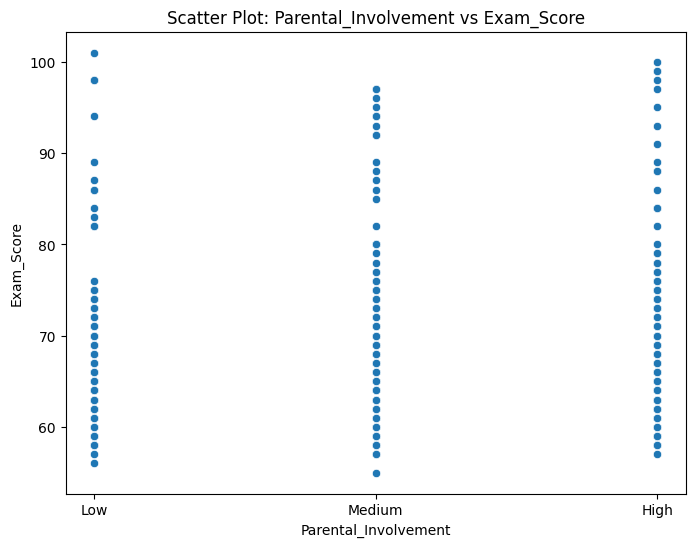

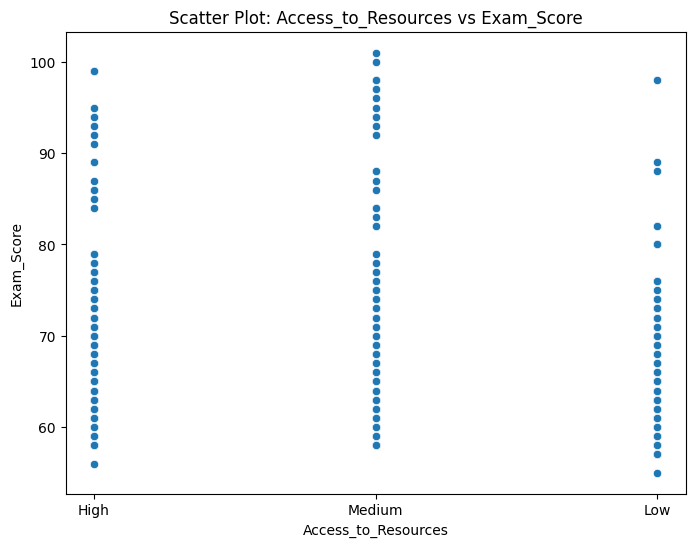

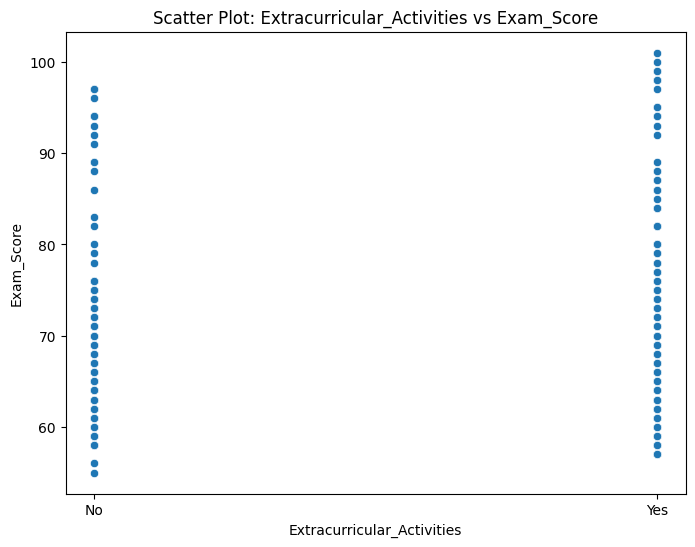

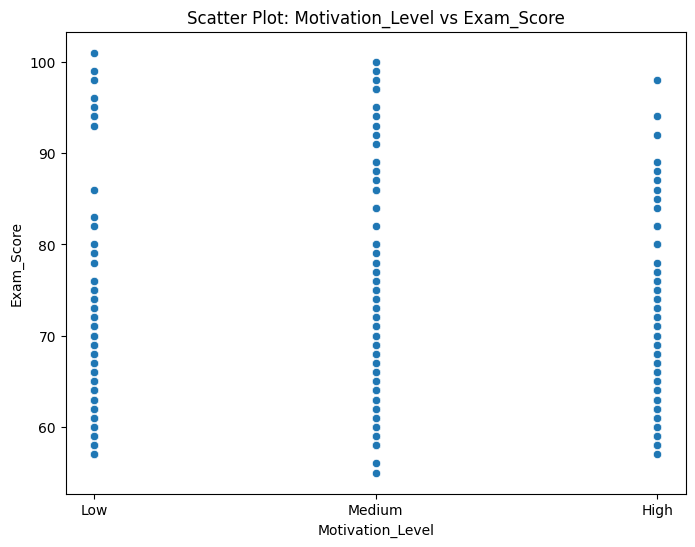

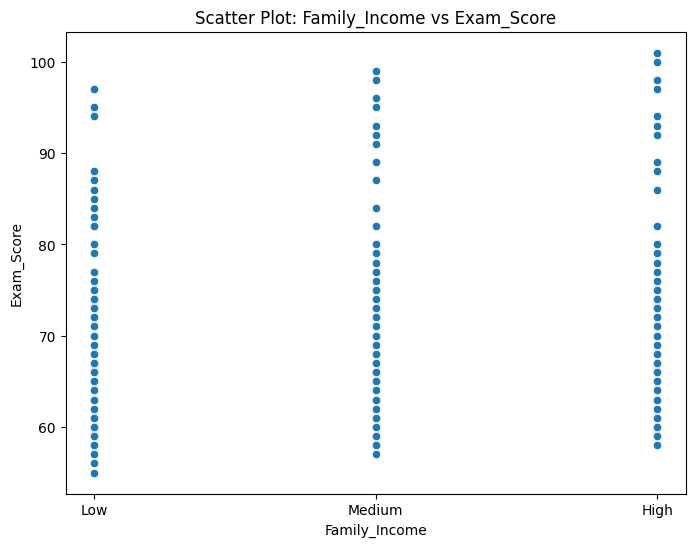

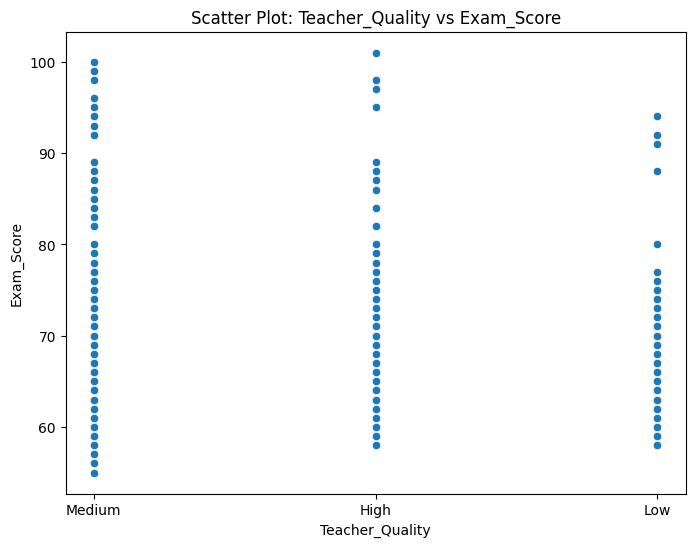

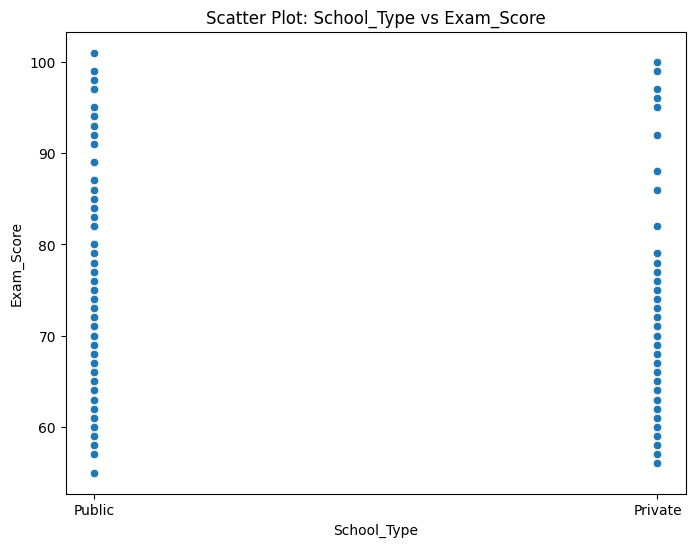

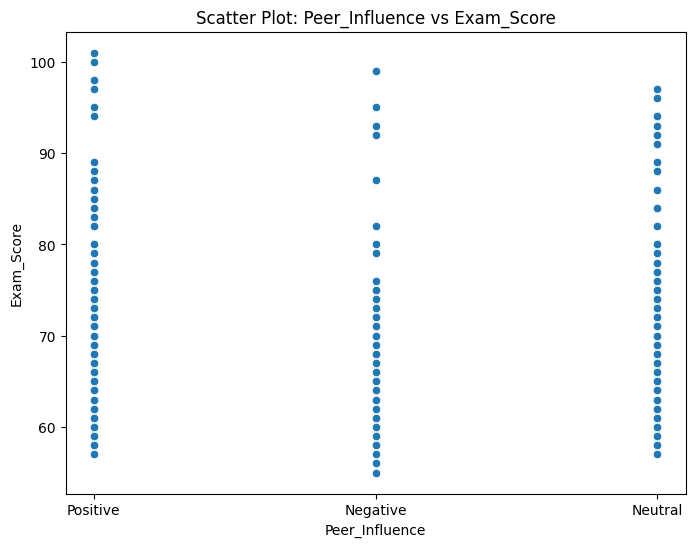

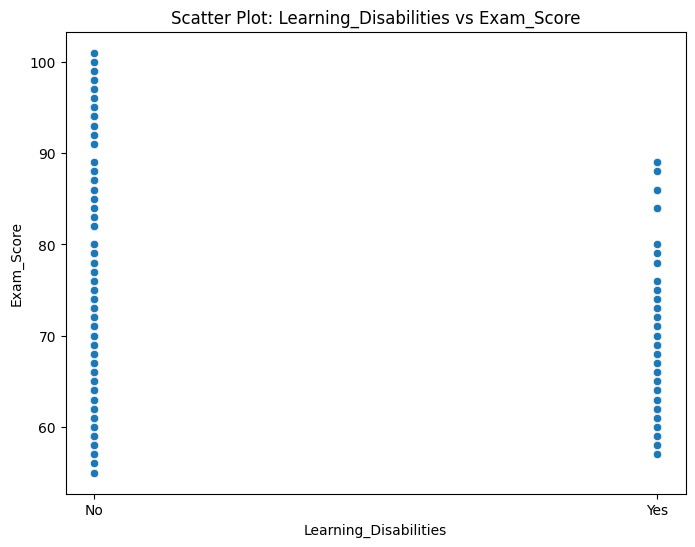

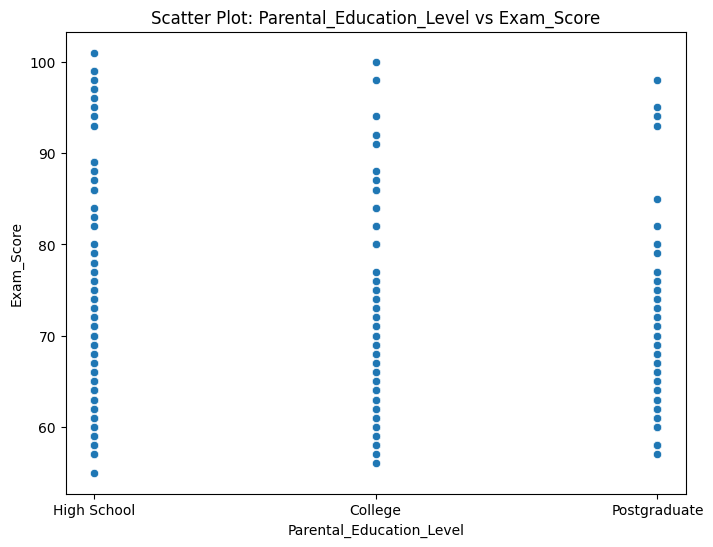

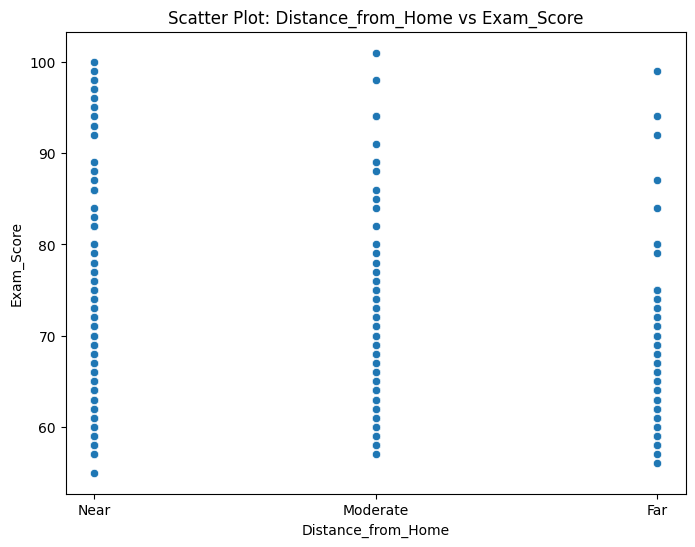

In [34]:
for col in cat_cols:
    if col != 'Exam_Score':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=teams, x=col, y='Exam_Score')
        plt.title(f"Scatter Plot: {col} vs Exam_Score")
        plt.xlabel(col)
        plt.ylabel('Exam_Score')
        plt.show()


Selanjutnya dipilih hanya kolom-kolom yang memiliki korelasi

In [37]:
x_train_capped=x_train_capped.drop(columns=['Motivation_Level', 'Family_Income', 'School_Type', 'Sleep_Hours', 'Physical_Activity'])
x_test_capped=x_test_capped.drop(columns=['Motivation_Level', 'Family_Income', 'School_Type', 'Sleep_Hours', 'Physical_Activity'])
x_train_capped

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Tutoring_Sessions,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
3954,17,79,Medium,High,Yes,84,0,Medium,Neutral,No,High School,Moderate
5204,34,78,Medium,High,Yes,68,1,Medium,Negative,No,College,Near
2030,25,67,Medium,High,No,82,1,Medium,Positive,No,Postgraduate,Far
4617,3,99,Medium,Low,Yes,68,2,Medium,Neutral,No,High School,Near
6281,21,95,Low,Medium,No,78,2,High,Neutral,Yes,High School,Near
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7,74,Medium,Medium,Yes,66,1,High,Positive,No,High School,Near
3264,24,96,Medium,High,Yes,69,1,Medium,Positive,No,High School,Near
1653,18,82,High,Medium,Yes,85,3,High,Neutral,No,Postgraduate,Near
2607,7,88,Medium,High,Yes,64,2,High,Neutral,No,Postgraduate,Moderate


## Asumption 1: Linear Relationship

Uji asumsi ini bertujuan untuk menguji apakah variable dependent (target) dan variable independent (feature) bersifat linear atau tidak

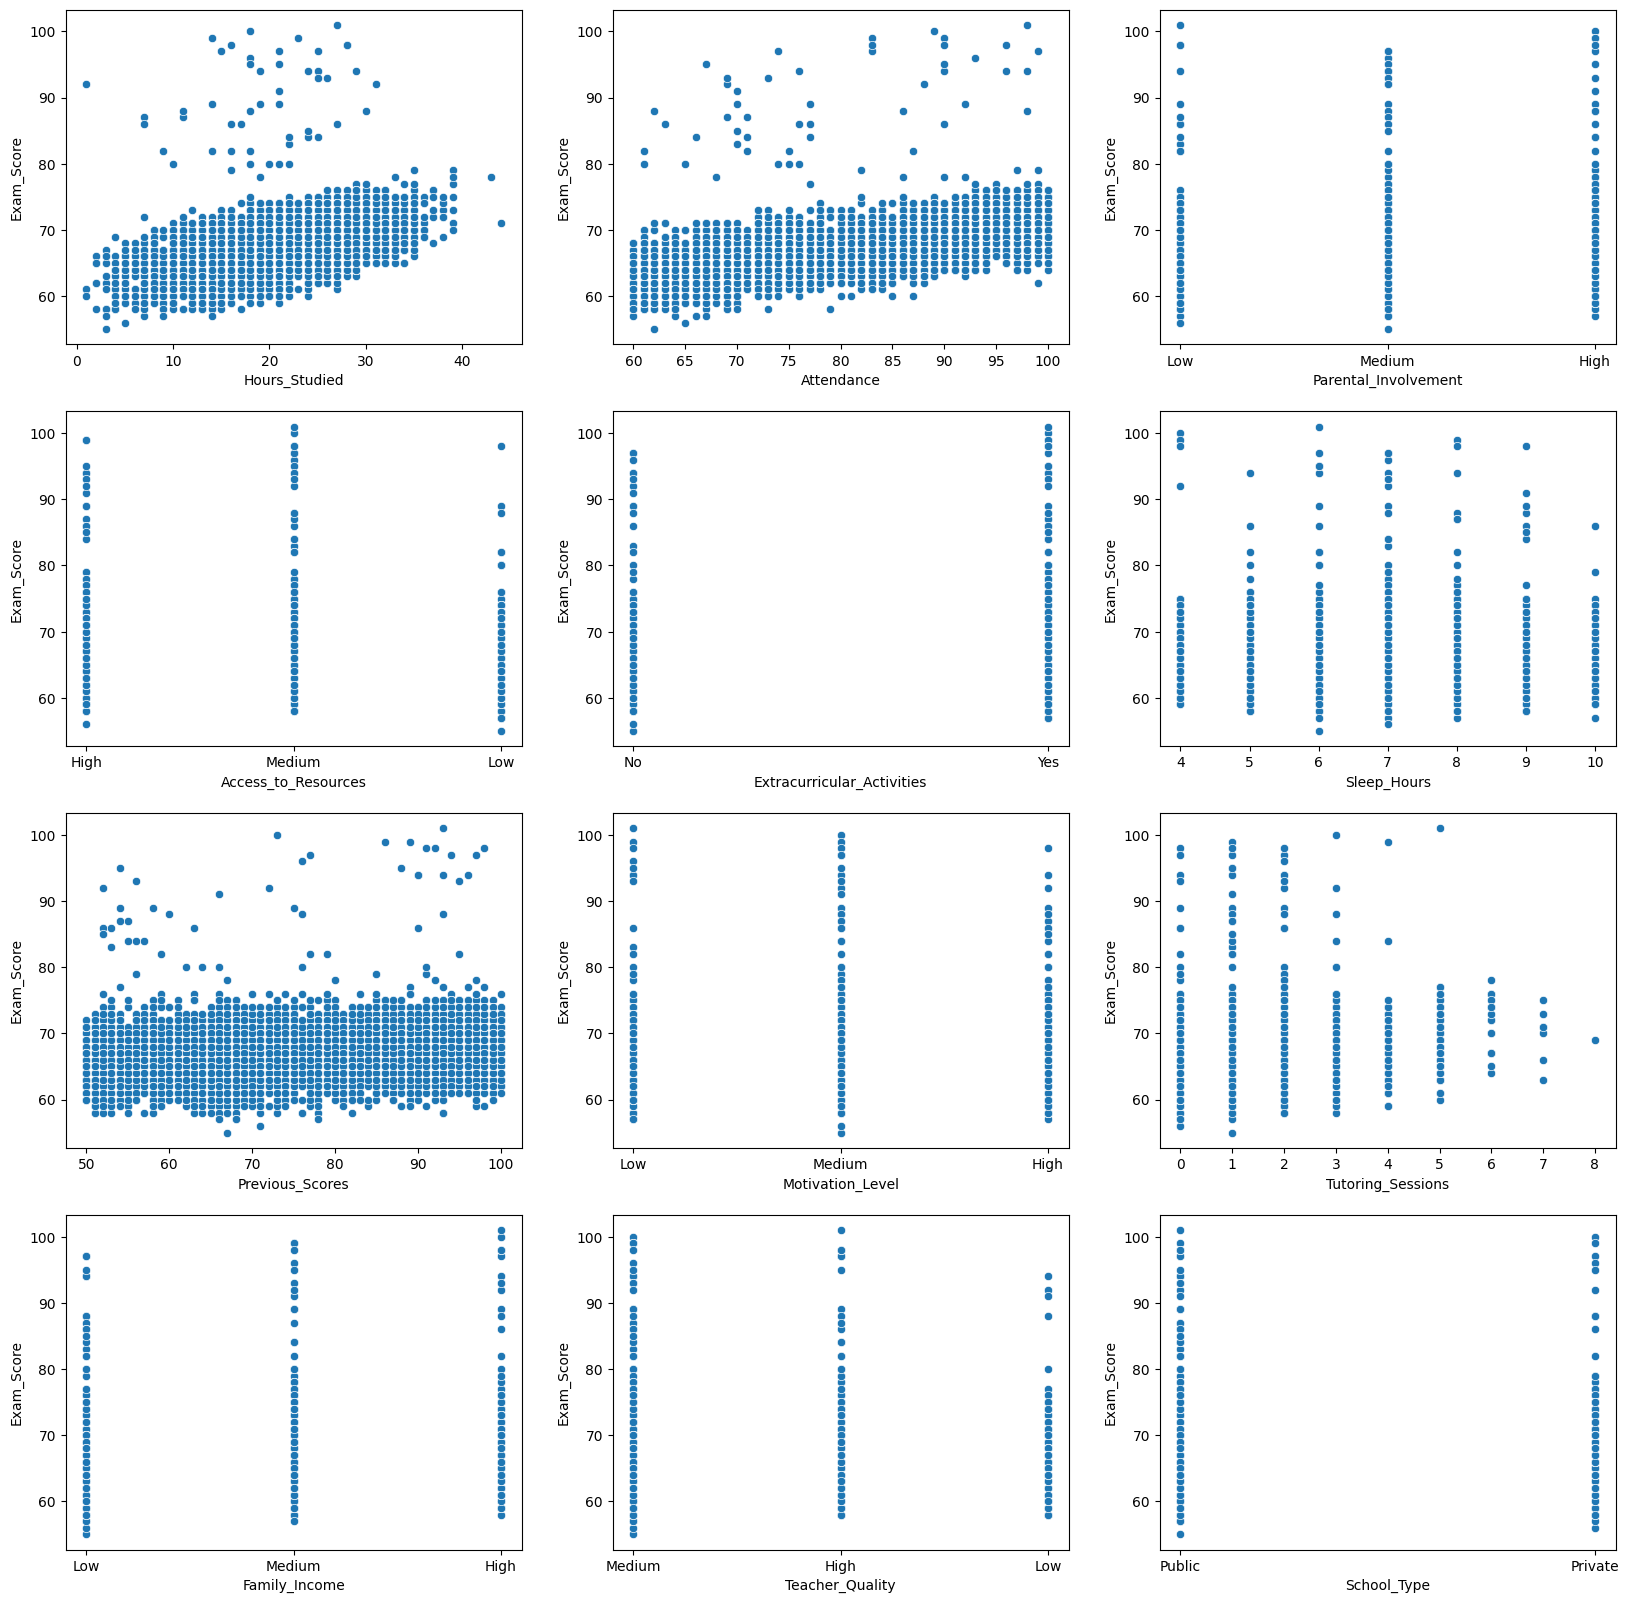

In [136]:
# Check the relationship between independent variables and dependent variable

fig = plt.figure(figsize=(20, 20))
cols = x.columns.tolist()
num_rows = 4
num_cols = 3

for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.scatterplot(data=teams, x=cols[index-1], y='Exam_Score')
plt.show()

Dari hasil uji di atas, dapat kita simpulkan bahwa terdapat hubungan yang linear antara dependent variables dengan independent variables. Selanjutnya akan dilakukan pemilihan terhadap kolom-kolom yang diperlukan

Penghapusan kolom yang tidak perlu

In [135]:
columns_to_drop = ['Sleep_Hours', 'Physical_Activity', 'Exam_Score']
numeric_cols=[col for col in num_cols if col not in columns_to_drop]
numeric_cols

['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

In [39]:
cols_to_drop = ['Motivation_Level', 'Family_Income', 'School_Type', 'Internet_Access', 'Gender']
categorical_cols = [col for col in cat_cols if col not in cols_to_drop]
categorical_cols

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Teacher_Quality',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home']

# 6. Model Definition

Selanjutnya akan dilakukan pembuatan model dengan menggunakan beberapa metode diantaranya KNN, SVM, Decision Tree, Random Forest, dan XGBoost.
Metode-metode ini digunakan untuk perbandingan antara satu metode dengan metode lain untuk kemudian dipilih metode yang memiliki hasil paling baik. Model yang terbaik nantinya akan ditingkatkan performanya lewat hyperparameter tuning dengan parameternya berupa:
- Nilai Kernel; untuk menentukan jenis hubungan (linear/non-linear) yang akan dipelajari model
- Nilai C; untuk mengontrol regularisasi/mengontrol keseimbangan sejauh mana model mencoba untuk menyesuaikan data pelatihan. Semakin kecil nilainya, semakin besar kemungkinan lebih banyak margin error
- Nilai Gamma; untuk mengontrol radius pengaruh data pada kerner non linear (RBF/Polynomial). Semakin kecil angkanya, semakin besar pengaruh yang dimiliki oleh setiap titik data, semakin cenderung model untuk underfitting

## Pipeline

In [101]:
#Create a pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown='ignore'))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, numeric_cols),
    ('pipe_cat', cat_pipeline, categorical_cols)])



# 7. Model Training

### KNN

In [ ]:
reg_knn = make_pipeline(preprocessing_pipeline, KNeighborsRegressor())
reg_knn.fit(x_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Teacher_Quality',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

### SVM

Karena model termasuk ke dalam regression, maka metode yang akan digunakan adalah SVR

In [ ]:
reg_svr = make_pipeline(preprocessing_pipeline, SVR())
reg_svr.fit(x_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Teacher_Quality',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home'])])),
                ('svr', SVR())])

### Decision Tree

In [ ]:
reg_dt = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor())
reg_dt.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Teacher_Quality',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

### Random Forest

In [ ]:
reg_rf =  make_pipeline(preprocessing_pipeline, RandomForestRegressor())
reg_rf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Teacher_Quality',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home'])])),
                ('randomforestregressor', RandomForestRegressor())])

### XGBoost

In [ ]:
reg_xgb = make_pipeline(preprocessing_pipeline, xg.XGBRegressor())
reg_xgb.fit(x_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenco...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# 8. Model Evaluation

## KNN

In [102]:
print('Pipeline steps : ', reg_knn.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Hours_Studied', 'Attendance',
                                  'Previous_Scores', 'Tutoring_Sessions']),
                                ('pipe_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Parental_Involvement', 'Access_to_Resources',
                                  'Extrac

Cek Performa Model

In [103]:
# #Model prediction
y_pred_train = reg_knn.predict(x_train)
y_pred_test = reg_knn.predict(x_test)


In [104]:
# Evaluasi pada data train
print("Regression Metrics pada Data Training:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.4f}")

# Evaluasi pada data test
print("\nRegression Metrics pada Data Testing:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")


Regression Metrics pada Data Training:
Mean Absolute Error (MAE): 2.1801
Mean Squared Error (MSE): 14.0857
R² Score: 0.0611

Regression Metrics pada Data Testing:
Mean Absolute Error (MAE): 3.0847
Mean Squared Error (MSE): 19.2984
R² Score: -0.2185


Cross Validation

Karena kita akan menghitung performa keseluruhan model, maka metode scoring yang akan digunakan adalah R2 Score

In [105]:
# Definisikan scorer untuk metrik yang diinginkan
r2_scorer = make_scorer(r2_score, greater_is_better=False)

# Lakukan cross-validation
cv_scores = cross_val_score(reg_knn, x, y, cv=5, scoring=r2_scorer)

# # Konversi MSE ke nilai positif dan cetak rata-rata
# cv_scores = -cv_scores
print(f"Cross-Validated Mean(R2 Score): {cv_scores.mean():.4f}")
print(f"Standard Deviation of R2 Score: {cv_scores.std():.4f}")


C:\Users\asusn\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Mean(R2 Score): 0.1325
Standard Deviation of R2 Score: 0.0419


Nilai rata-rata R2 Score di bawah 0 menunjukan bahwa model gagal untuk mengangkap pola data. Sedangkan nilai standar deviasi yang < 0.1 menunjukan model yang konsisten untuk berbagai data. Artinya performa model cukup buruk meskipun cukup konsisten. Hal ini bisa menjadi indikasi bahwa model terlalu sederhana untuk menangkap hubungan antar data. Oleh karena itu, perhitungan menggunakan model lain akan dilakukan 

## SVM

Cek Performa Model

In [106]:
# #Model prediction
y_pred_train_svr = reg_svr.predict(x_train)
y_pred_test_svr = reg_svr.predict(x_test)


In [107]:
# Evaluasi pada data train
print("Regression Metrics pada Data Training:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train_svr):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train_svr):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train_svr):.4f}")

# Evaluasi pada data test
print("\nRegression Metrics pada Data Testing:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test_svr):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test_svr):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_test_svr):.4f}")


Regression Metrics pada Data Training:
Mean Absolute Error (MAE): 0.7088
Mean Squared Error (MSE): 4.2355
R² Score: 0.7177

Regression Metrics pada Data Testing:
Mean Absolute Error (MAE): 0.8543
Mean Squared Error (MSE): 6.2739
R² Score: 0.6039


Cross Validation

In [108]:
# Definisikan scorer untuk metrik yang diinginkan
r2_scorer_svr = make_scorer(r2_score, greater_is_better=False)

# Lakukan cross-validation
cv_scores_svr = cross_val_score(reg_svr, x, y, cv=5, scoring=r2_scorer_svr)

# # Konversi MSE ke nilai positif dan cetak rata-rata
# cv_scores = -cv_scores
print(f"Cross-Validated Mean(R2 Score): {cv_scores_svr.mean():.4f}")
print(f"Standard Deviation of R2 Score: {cv_scores_svr.std():.4f}")


Cross-Validated Mean(R2 Score): -0.6920
Standard Deviation of R2 Score: 0.0645


## Decision Tree

Cek Performa Model

In [109]:
# #Model prediction
y_pred_train_dt = reg_svr.predict(x_train)
y_pred_test_dt = reg_svr.predict(x_test)


In [110]:
# Evaluasi pada data train
print("Regression Metrics pada Data Training:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train_dt):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train_dt):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train_dt):.4f}")

# Evaluasi pada data test
print("\nRegression Metrics pada Data Testing:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test_dt):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test_dt):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_test_dt):.4f}")


Regression Metrics pada Data Training:
Mean Absolute Error (MAE): 0.7088
Mean Squared Error (MSE): 4.2355
R² Score: 0.7177

Regression Metrics pada Data Testing:
Mean Absolute Error (MAE): 0.8543
Mean Squared Error (MSE): 6.2739
R² Score: 0.6039


Cross Validation

In [111]:
# Definisikan scorer untuk metrik yang diinginkan
r2_scorer_dt = make_scorer(r2_score, greater_is_better=False)

# Lakukan cross-validation
cv_scores_dt = cross_val_score(reg_dt, x, y, cv=5, scoring=r2_scorer_dt)


print(f"Cross-Validated Mean(R2 Score): {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation of R2 Score: {cv_scores_dt.std():.4f}")


Cross-Validated Mean(R2 Score): -0.0907
Standard Deviation of R2 Score: 0.1011


## Random Forest

Cek Performa Model

In [112]:
# #Model prediction
y_pred_train_rf = reg_rf.predict(x_train)
y_pred_test_rf = reg_rf.predict(x_test)


In [113]:
# Evaluasi pada data train
print("Regression Metrics pada Data Training:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train_rf):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train_rf):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train_rf):.4f}")

# Evaluasi pada data test
print("\nRegression Metrics pada Data Testing:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test_rf):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test_rf):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_test_rf):.4f}")


Regression Metrics pada Data Training:
Mean Absolute Error (MAE): 0.6402
Mean Squared Error (MSE): 1.2492
R² Score: 0.9167

Regression Metrics pada Data Testing:
Mean Absolute Error (MAE): 1.2495
Mean Squared Error (MSE): 7.2908
R² Score: 0.5397


Cross Validation

In [ ]:
# Definisikan scorer untuk metrik yang diinginkan
r2_scorer_rf = make_scorer(r2_score, greater_is_better=False)

# Lakukan cross-validation
cv_scores_rf = cross_val_score(reg_dt, x, y, cv=5, scoring=r2_scorer_rf)


print(f"Cross-Validated Mean(R2 Score): {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation of R2 Score: {cv_scores_rf.std():.4f}")


Cross-Validated Mean(R2 Score): -0.1728
Standard Deviation of R2 Score: 0.1649


## XGBoost

Cek Performa Model

In [116]:
# #Model prediction
y_pred_train_xgb = reg_xgb.predict(x_train)
y_pred_test_xgb = reg_xgb.predict(x_test)


In [117]:
# Evaluasi pada data train
print("Regression Metrics pada Data Training:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train_xgb):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train_xgb):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train_xgb):.4f}")

# Evaluasi pada data test
print("\nRegression Metrics pada Data Testing:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test_xgb):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test_xgb):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_test_xgb):.4f}")


Regression Metrics pada Data Training:
Mean Absolute Error (MAE): 0.4753
Mean Squared Error (MSE): 0.6784
R² Score: 0.9548

Regression Metrics pada Data Testing:
Mean Absolute Error (MAE): 1.1576
Mean Squared Error (MSE): 7.4582
R² Score: 0.5291


Cross Validation

In [118]:
# Definisikan scorer untuk metrik yang diinginkan
r2_scorer_xgb = make_scorer(r2_score, greater_is_better=False)

# Lakukan cross-validation
cv_scores_xgb = cross_val_score(reg_xgb, x, y, cv=5, scoring=r2_scorer_xgb)


print(f"Cross-Validated Mean(R2 Score): {cv_scores_xgb.mean():.4f}")
print(f"Standard Deviation of R2 Score: {cv_scores_xgb.std():.4f}")


Cross-Validated Mean(R2 Score): -0.6054
Standard Deviation of R2 Score: 0.0498


Dari perhitungan di atas dapat disimpulkan bahwa

## Base Model Comparison

In [121]:
models ={'KNN': reg_knn,
        'SVC': reg_svr,
        'Decision Tree': reg_dt,
        'Random Forest': reg_rf,
        'XGBoost': reg_xgb}

metrics = {'R2 Score': r2_score}

data = pd.DataFrame(columns = models.keys(), index=['R2 Score'])

for metric in metrics.keys():
    for model in models.keys():
        data.loc[metric, model] = metrics[metric](y_test, models[model].predict(x_test))

In [122]:
data

,KNN,SVC,Decision Tree,Random Forest,XGBoost
R2 Score,0.18594,0.603872,0.102046,0.539666,0.529093


In [123]:
models_cv = {
          'KNN': reg_knn,
          'SVC': reg_svr,
          'Decision Tree': reg_dt,
          'Random Forest': reg_rf,
          'XGBoost': reg_xgb}

metrics = {
    'Mean': [],
    'Std': []
}

for model_name, model in models_cv.items():
    r2_scores = cross_val_score(model, x_train, y_train, cv=4, scoring=r2_scorer)

    metrics['Mean'].append(r2_scores.mean())
    metrics['Std'].append(r2_scores.std())

data_cross_val = pd.DataFrame(metrics, index=models_cv.keys()).T

In [124]:
data_cross_val

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Mean,-0.288128,-0.710699,-0.138931,-0.641537,-0.629374
Std,0.023390,0.071826,0.052473,0.060751,0.062798


```
Hasil analisa model menggunakan acuan sebagai berikut:
- Semakin tinggi nilai mean R2 (mendekati 1), semakin bagus model
- Semakin rendah nilai standar deviasi R2, semakin stabil model
Dari hasil di atas, dapat dilihat metode yang memiliki score paling tinggi adalah SVC. Maka, selanjutnya kita akan menggunakan metode tersebut untuk di tuning

## Hyperparameter Tuning

In [125]:
param_svr = {'svr__kernel': ['linear', 'rbf', 'poly'],
             'svr__C': [0.1, 1, 10, 100],
             'svr__gamma': [0.001, 0.01, 1]
             }

In [126]:
grid_svr = RandomizedSearchCV(reg_svr, param_svr, cv=5, random_state=0).fit(x_train, y_train)

print('Train Set Score:', grid_svr.score(x_train, y_train))
print('Test Set Score:', grid_svr.score(x_test, y_test))

Train Set Score: 0.7175679287683994
Test Set Score: 0.6015083104979767


In [127]:
best_param_svr = grid_svr.best_params_
best_reg_svr = grid_svr.best_estimator_

print('Best Params: ', best_param_svr)
print('Best Estimator: ', best_reg_svr)


Best Params:  {'svr__kernel': 'linear', 'svr__gamma': 0.01, 'svr__C': 100}
Best Estimator:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                              

Cek performa model terhadap dataset

In [128]:
#Prediksi hasil tuning
y_pred = grid_svr.predict(x_test)

#Evaluasi performa
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 6.311305453179395
MAE: 0.7775174387629895
R2: 0.6015083104979767


Visualisasi residual (selisih antara nilai test set dengan nilai prediksi)

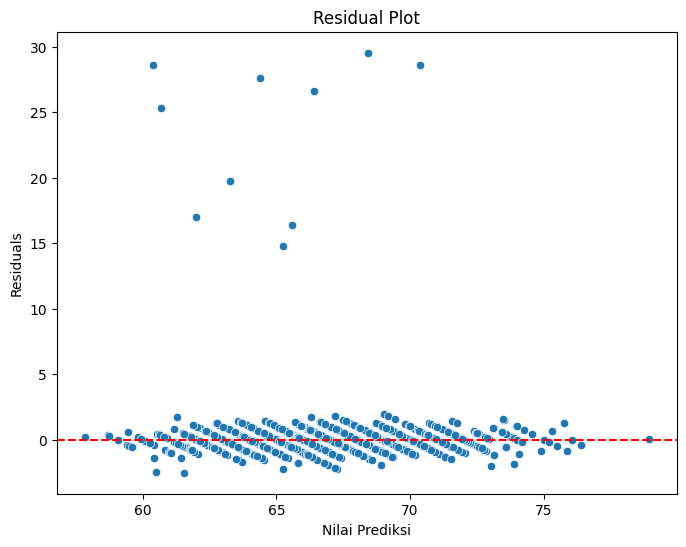

In [130]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Validasi model

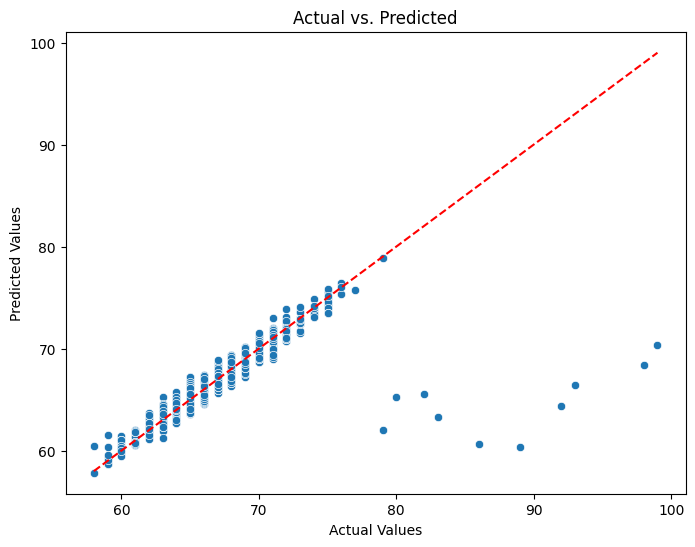

In [131]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


In [132]:
#save ke dictionary
result_teams_svr = pd.DataFrame.from_dict(grid_svr.cv_results_, orient='columns')
print('Data: ', result_teams_svr.columns)

Data:  Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svr__kernel', 'param_svr__gamma', 'param_svr__C', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


Dari hasil hyperparameter tuning, dapat disimpulkan bahwa

# 9. Model Saving

In [87]:
with open('best_pipeline.pkl', 'wb') as file_1:
    pickle.dump(best_reg_svr, file_1)

# 11. Kesimpulan

Kesimpulan yang bisa ditarik dari analisa ini adalah:
* Metric yang digunakan pada proses pembuatan model ini adalah R2. Tujuannya adalah untuk melihat performa keseluruhan model. Semakin besar nilai rata-rata (semakin mendekati nilai 1) maka hasilnya semakin bagus, semakin kecil nilai standar deviasinya, semakin stabil modelnya. Model ini memiliki nilai rata-rata 0.6 dan standar deviasi 0.04 artinya model ini cukup baik untuk digunakan sebagai model prediction
* Keterlibatan orang tua, jarak dari rumah ke sekolah, serta latar belakang pendidikan orang tua memiliki hubungan terhadap performa anak di sekolah
* Saran untuk orang tua: 
    - Saat hendak mendaftarkan anak ke sekolah, jangan hanya memperhatikan kualitas sekolah yang baik, namun jarak juga harus dipertimbangkan. Semakin jauh jarak dari rumah ke sekolah, semakin besar kemungkinan performa anak di sekolah menurun karena besar kemungkinan disebabkan kelelahan selama di perjalanan
    - Orang tua hendaknya juga terlibat dalam tumbuh kembang anak di sekolah seperti memberikan dukungan mental kepada anak dan fasilitas yang dapat mendukung tumbuh kembang anak
    - Untuk para individu dan calon orang tua yang berencana memiliki anak, hendaknya meningkatkan kualitas diri melalui edukasi dan peningkatan income karena kedua hal tersebut menjadi faktor yang berpengaruh sebagai role model untuk anak
* Saran untuk siswa:
    - Fokus lah kepada hal-hal yang bisa dikontrol seperti jam belajar dan kehadiran di kelas. Meskipun kedua hal tersebut tidak selalu berkorelasi lurus terhadap performa siswa, namun dapat memperkecil peluang siswa untuk gagal
    - Jaga lah jam tidur untuk menjaga kondisi tubuh dan konsentrasi. Jangan terlalu sering begadang jika tidak terlalu dibutuhkan
    - Coba lah ikut ektra kurikuler untuk membuat variasi dalam kegiatan sehari-hari agar tidak jenuh dan dapat dapat menjadi sarana untuk meningkatkan hubungan antar teman sejawat
* Evaluasi model: Model yang dibuat sudah cukup baik dan stabil. Namun masih kurang dalam hal keakuratannya. Peningkatan model dapat dilakukan dengan cara menambahkan data agar model dapat belajar pola lebih baik atau menyesuaikan feature selection supaya model dapat bekerja lebih baik